# Exploratory Data Analysis - Customer Churn

This notebook performs exploratory data analysis on the customer churn dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load Data

In [2]:
# Load dataset
df = pd.read_csv('../data/customer_subscription_churn_usage_patterns.csv')

print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (2800, 10)


,user_id,signup_date,plan_type,monthly_fee,avg_weekly_usage_hours,support_tickets,payment_failures,tenure_months,last_login_days_ago,churn
0,1,2023-04-15,Premium,699,1.1,4,1,8,14,Yes
1,2,2023-08-27,Premium,699,2.6,6,0,35,1,Yes
2,3,2023-10-12,Premium,699,14.3,8,3,2,14,Yes
3,4,2023-12-11,Basic,199,17.6,5,2,11,9,Yes
4,5,2023-02-14,Basic,199,9.8,5,2,6,38,Yes


## Data Overview

In [3]:
# Display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 2800 non-null   int64  
 1   signup_date             2800 non-null   object 
 2   plan_type               2800 non-null   object 
 3   monthly_fee             2800 non-null   int64  
 4   avg_weekly_usage_hours  2800 non-null   float64
 5   support_tickets         2800 non-null   int64  
 6   payment_failures        2800 non-null   int64  
 7   tenure_months           2800 non-null   int64  
 8   last_login_days_ago     2800 non-null   int64  
 9   churn                   2800 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 218.9+ KB


In [4]:
# Statistical summary
df.describe()

,user_id,monthly_fee,avg_weekly_usage_hours,support_tickets,payment_failures,tenure_months,last_login_days_ago
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,1400.500000,434.214286,12.891429,3.887857,2.491786,18.612857,30.005000
std,808.434702,205.678472,7.109691,2.606419,1.691647,10.374487,17.852757
min,1.000000,199.000000,0.500000,0.000000,0.000000,1.000000,0.000000
25%,700.750000,199.000000,6.700000,2.000000,1.000000,10.000000,14.000000
50%,1400.500000,399.000000,12.800000,4.000000,2.000000,18.000000,30.000000
75%,2100.250000,699.000000,19.200000,6.000000,4.000000,27.000000,46.000000
max,2800.000000,699.000000,25.000000,8.000000,5.000000,36.000000,60.000000


## Churn Distribution

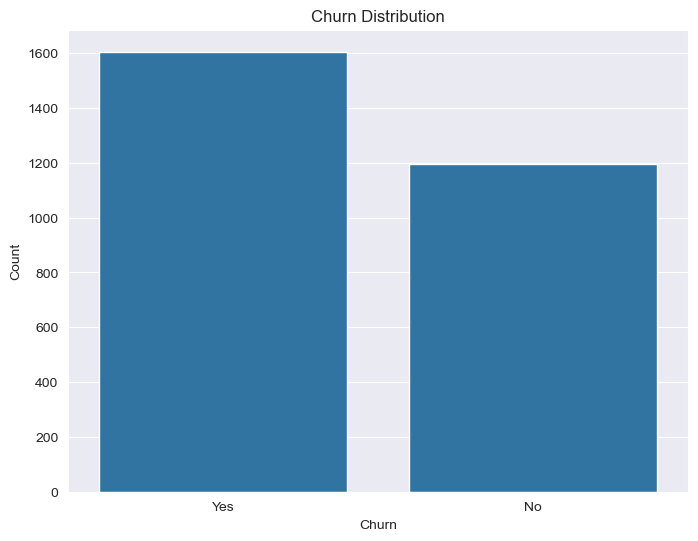

Churn rate: 57.32%


In [5]:
# Churn distribution
churn_counts = df['churn'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

print(f"Churn rate: {churn_counts['Yes'] / len(df) * 100:.2f}%")

## Feature Analysis

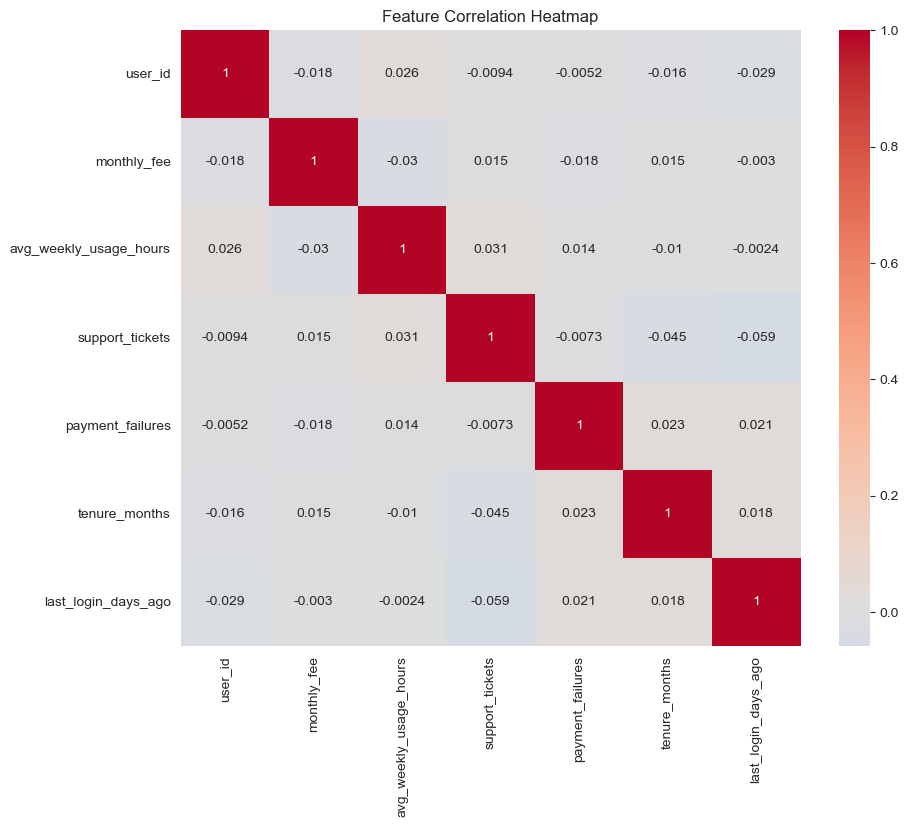

In [6]:
# Correlation heatmap
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

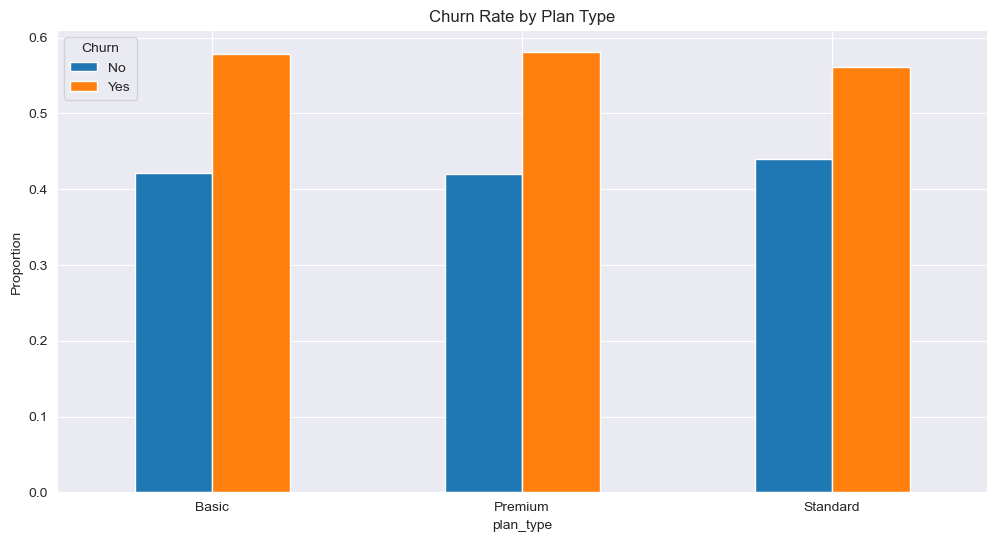

In [7]:
# Plan type vs Churn
pd.crosstab(df['plan_type'], df['churn'], normalize='index').plot(kind='bar')
plt.title('Churn Rate by Plan Type')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

## Conclusions

- Document key findings here
- Identify important features for modeling
- Note any data quality issues